"""
案例: 演示 CART 分类回归决策树的 分类功能.
"""


In [2]:
# 导包
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

In [3]:
# 1. 加载数据.
data = pd.read_csv('./data/train.csv')
# data.info()

In [4]:
# 2. 数据的预处理.
# 2.1 提取特征和标签.
x = data[['Pclass', 'Sex', 'Age']]
y = data['Survived']
# print(x.head(5))
# print(y.head(5))

In [6]:
# 2. 数据的预处理.
# 2.1 提取特征和标签.
x = data[['Pclass', 'Sex', 'Age']]
y = data['Survived']
# print(x.head(5))
# print(y.head(5))

# 2.2 发现Age列有确实, 我们用该列的 平均值做填充.
# x['Age'].fillna(x['Age'].mean(), inplace=True)      # 会报警告, 但是可以用.
# x['Age'] = x['Age'].fillna(x['Age'].mean())           # 会报警告, 因为是直接修改源数据的.

# 解决方案, copy()数据之后再改.
x = x.copy()                                          # 拷贝数据, 不写也行.
x['Age'] = x['Age'].fillna(x['Age'].mean())           # 会报警告, 因为是直接修改源数据的.

# 2.3 查看处理后的数据集.
# x.info()

# 2.4 针对于 Sex列, 进行one-hot编码.
x = pd.get_dummies(x, columns=['Sex'])
# x.info()

# 2.5 划分训练集和测试集.
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=23)

In [7]:
# 3. 特征工程.

# 4. 模型训练
# 参数: max_depth=10 意思是: 绘制的 决策树结构, 最多10层.
estimator = DecisionTreeClassifier(max_depth=10)
estimator.fit(x_train, y_train)


DecisionTreeClassifier(max_depth=10)

In [8]:
# 5. 模型预测.
y_pred = estimator.predict(x_test)
print(f'预测值为: {y_pred}')

预测值为: [1 0 0 1 0 0 0 0 1 0 0 0 1 0 0 1 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 1 0 0 0 1 0 0 0 0 0 1 0 1 1 0 1 0 1 0 1 0 0 0 0 0 0 0 0 1 1 0 1 0 0 0 1
 0 0 1 0 1 1 0 1 1 0 0 0 1 0 1 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 1 0
 0 0 0 0 0 1 1 0 0 1 0 0 0 0 0 0 1 1 0 0 1 0 0 0 1 1 0 0 0 1 1 1 1 1 0 0 0
 1 0 1 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 1 1 1]


In [9]:
# 6. 模型评估.
print(f'分类评估报告: \n {classification_report(y_test, y_pred)}')


分类评估报告: 
               precision    recall  f1-score   support

           0       0.80      0.88      0.84       115
           1       0.74      0.61      0.67        64

    accuracy                           0.78       179
   macro avg       0.77      0.74      0.75       179
weighted avg       0.78      0.78      0.78       179



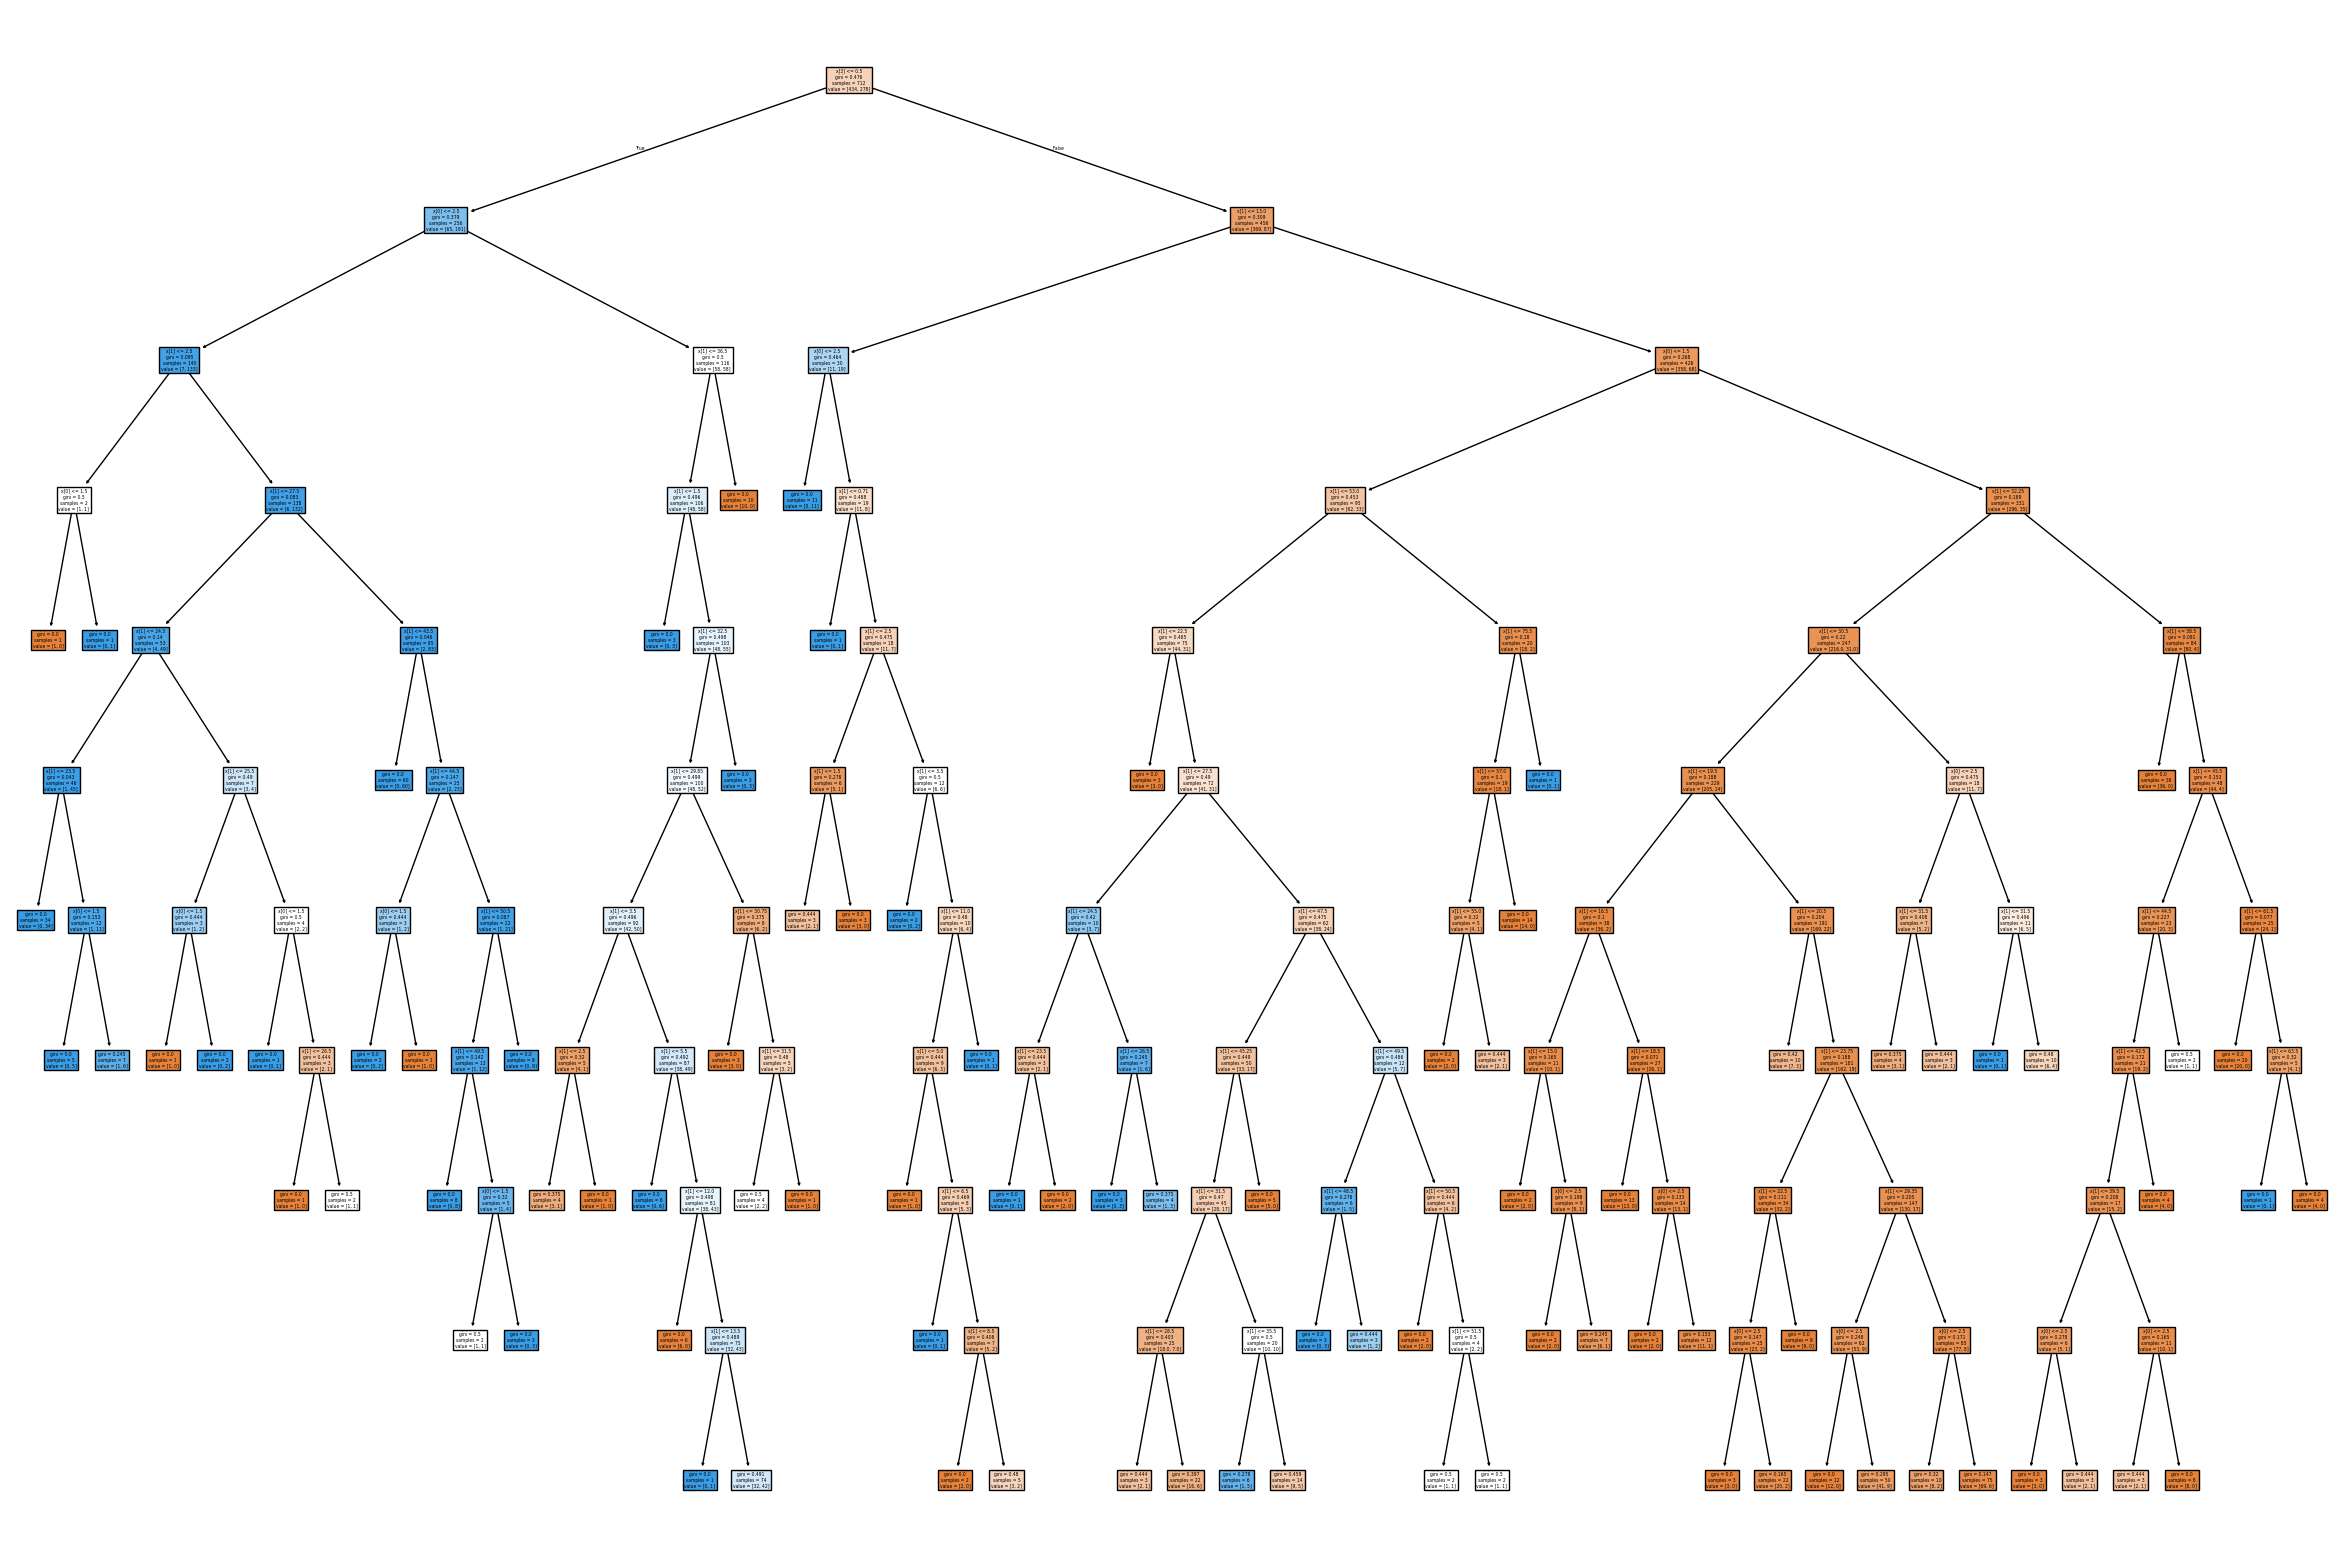

In [11]:
# 7. 绘制 决策树 图.
plt.figure(figsize=(30, 20))    # 设置图片大小, 30 * 100(dpi) * 20 * 100(dpi) = 3000 * 2000像素
# 参1: 模型对象, 参2: 是否用颜色填充, 参3: 绘制的 决策树结构, 最多10层.
plot_tree(estimator, filled=True, max_depth=10)
plt.savefig('./data/my_titanic.png')
plt.show()